In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df=pd.read_csv('forex_risk_dataset_simulated1.csv')
df

,client_id,date,deposit,withdrawal,win_rate,balance
0,client_1,1/1/2024,135,0,0.466608,4744.530343
1,client_1,1/4/2024,0,0,0.477195,5163.748279
2,client_1,1/6/2024,0,0,0.487820,5160.397425
3,client_1,1/7/2024,0,1127,0.694959,3978.111065
4,client_1,1/8/2024,0,0,0.491290,5876.045195
...,...,...,...,...,...,...
14865,client_99,11/29/2024,114,0,0.500068,2713.091628
14866,client_99,12/3/2024,315,0,0.370269,2760.732358
14867,client_99,12/5/2024,1060,1400,0.509235,5518.219499
14868,client_99,12/19/2024,1551,0,0.753304,3129.112546


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14870 entries, 0 to 14869
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   client_id   14870 non-null  object 
 1   date        14870 non-null  object 
 2   deposit     14870 non-null  int64  
 3   withdrawal  14870 non-null  int64  
 4   win_rate    14870 non-null  float64
 5   balance     14870 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 697.2+ KB


In [111]:
df['date']=pd.to_datetime(df['date'])

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14870 entries, 0 to 14869
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   client_id   14870 non-null  object        
 1   date        14870 non-null  datetime64[ns]
 2   deposit     14870 non-null  int64         
 3   withdrawal  14870 non-null  int64         
 4   win_rate    14870 non-null  float64       
 5   balance     14870 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 697.2+ KB


Datetime indexing for better timeseries analysis

In [114]:
df.set_index('date',inplace=True,drop='yes')

In [115]:
df

,client_id,deposit,withdrawal,win_rate,balance
date,,,,,
2024-01-01,client_1,135,0,0.466608,4744.530343
2024-01-04,client_1,0,0,0.477195,5163.748279
2024-01-06,client_1,0,0,0.487820,5160.397425
2024-01-07,client_1,0,1127,0.694959,3978.111065
2024-01-08,client_1,0,0,0.491290,5876.045195
...,...,...,...,...,...
2024-11-29,client_99,114,0,0.500068,2713.091628
2024-12-03,client_99,315,0,0.370269,2760.732358
2024-12-05,client_99,1060,1400,0.509235,5518.219499


Carrying out monthly aggregation for each client 

In [117]:
monthly_df=df.groupby(['client_id']).resample('ME').agg({'deposit':'sum','withdrawal':'sum','win_rate':'mean','balance':['mean','std']}) 	

In [118]:
monthly_df

deposit withdrawal  win_rate      balance             
                         sum        sum      mean         mean          std
client_id date                                                             
client_1  2024-01-31    5465       3747  0.569773  4203.850354  2025.007083
          2024-02-29   11683       7711  0.597953  5800.766716  1519.040311
          2024-03-31    7922       6234  0.589564  5378.574426  2331.757475
          2024-04-30    7497       7611  0.567035  5267.488788  2002.223161
          2024-05-31    6824       4266  0.405353  5828.960728  1296.150857
...                      ...        ...       ...          ...          ...
client_99 2024-08-31    5992       2971  0.725661  3949.418719   479.724635
          2024-09-30    1478       1396  0.541520  6038.391971  2118.678490
          2024-10-31    1467        546  0.369886  4004.679612  2768.189556
          2024-11-30    1183        747  0.494542  4082.803423  1528.526254
          2024-12-31    2926       1400  0.563710  3347.604443  1523.990132

[1200 rows x 5 columns]

In [119]:
monthly_df.columns=['deposit_sum','withdrawal_sum','avg_win_rate','avg_balance','balance_volatility']


In [120]:
monthly_df

deposit_sum  withdrawal_sum  avg_win_rate  avg_balance  \
client_id date                                                                 
client_1  2024-01-31         5465            3747      0.569773  4203.850354   
          2024-02-29        11683            7711      0.597953  5800.766716   
          2024-03-31         7922            6234      0.589564  5378.574426   
          2024-04-30         7497            7611      0.567035  5267.488788   
          2024-05-31         6824            4266      0.405353  5828.960728   
...                           ...             ...           ...          ...   
client_99 2024-08-31         5992            2971      0.725661  3949.418719   
          2024-09-30         1478            1396      0.541520  6038.391971   
          2024-10-31         1467             546      0.369886  4004.679612   
          2024-11-30         1183             747      0.494542  4082.803423   
          2024-12-31         2926            1400      0.563710  3347.604443   

                      balance_volatility  
client_id date                            
client_1  2024-01-31         2025.007083  
          2024-02-29         1519.040311  
          2024-03-31         2331.757475  
          2024-04-30         2002.223161  
          2024-05-31         1296.150857  
...                                  ...  
client_99 2024-08-31          479.724635  
          2024-09-30         2118.678490  
          2024-10-31         2768.189556  
          2024-11-30         1528.526254  
          2024-12-31         1523.990132  

[1200 rows x 5 columns]

Calculating the netflow per client per month
Calculating the deposit to withdrawal ratio per client per month


In [138]:
monthly_df['net_flow']=monthly_df['deposit_sum']-monthly_df['withdrawal_sum']
monthly_df['dep_wd_ratio']=monthly_df['deposit_sum']/(monthly_df['withdrawal_sum']+1)

In [140]:
monthly_df

deposit_sum  withdrawal_sum  avg_win_rate  avg_balance  \
client_id date                                                                 
client_1  2024-01-31         5465            3747      0.569773  4203.850354   
          2024-02-29        11683            7711      0.597953  5800.766716   
          2024-03-31         7922            6234      0.589564  5378.574426   
          2024-04-30         7497            7611      0.567035  5267.488788   
          2024-05-31         6824            4266      0.405353  5828.960728   
...                           ...             ...           ...          ...   
client_99 2024-08-31         5992            2971      0.725661  3949.418719   
          2024-09-30         1478            1396      0.541520  6038.391971   
          2024-10-31         1467             546      0.369886  4004.679612   
          2024-11-30         1183             747      0.494542  4082.803423   
          2024-12-31         2926            1400      0.563710  3347.604443   

                      balance_volatility  net_flow  dep_wd_ratio  
client_id date                                                    
client_1  2024-01-31         2025.007083      1718      1.458111  
          2024-02-29         1519.040311      3972      1.514912  
          2024-03-31         2331.757475      1688      1.270569  
          2024-04-30         2002.223161      -114      0.984892  
          2024-05-31         1296.150857      2558      1.599250  
...                                  ...       ...           ...  
client_99 2024-08-31          479.724635      3021      2.016151  
          2024-09-30         2118.678490        82      1.057981  
          2024-10-31         2768.189556       921      2.681901  
          2024-11-30         1528.526254       436      1.581551  
          2024-12-31         1523.990132      1526      2.088508  

[1200 rows x 7 columns]

Defining the risk score

In [142]:
monthly_df['risk_score'] = (
    monthly_df['balance_volatility'] * 0.35 +
    (1 - monthly_df['avg_win_rate']) * 0.35 +
    (monthly_df['withdrawal_sum'] / (monthly_df['deposit_sum'] + 1)) * 0.15 +
    (-monthly_df['net_flow']) * 0.15
)

In [148]:
monthly_df

deposit_sum  withdrawal_sum  avg_win_rate  avg_balance  \
client_id date                                                                 
client_1  2024-01-31         5465            3747      0.569773  4203.850354   
          2024-02-29        11683            7711      0.597953  5800.766716   
          2024-03-31         7922            6234      0.589564  5378.574426   
          2024-04-30         7497            7611      0.567035  5267.488788   
          2024-05-31         6824            4266      0.405353  5828.960728   
...                           ...             ...           ...          ...   
client_99 2024-08-31         5992            2971      0.725661  3949.418719   
          2024-09-30         1478            1396      0.541520  6038.391971   
          2024-10-31         1467             546      0.369886  4004.679612   
          2024-11-30         1183             747      0.494542  4082.803423   
          2024-12-31         2926            1400      0.563710  3347.604443   

                      balance_volatility  net_flow  dep_wd_ratio  risk_score  
client_id date                                                                
client_1  2024-01-31         2025.007083      1718      1.458111  451.305885  
          2024-02-29         1519.040311      3972      1.514912  -63.896180  
          2024-03-31         2331.757475      1688      1.270569  563.176792  
          2024-04-30         2002.223161      -114      0.984892  718.181905  
          2024-05-31         1296.150857      2558      1.599250   70.254685  
...                                  ...       ...           ...         ...  
client_99 2024-08-31          479.724635      3021      2.016151 -285.075997  
          2024-09-30         2118.678490        82      1.057981  729.539521  
          2024-10-31         2768.189556       921      2.681901  830.992675  
          2024-11-30         1528.526254       436      1.581551  469.855736  
          2024-12-31         1523.990132      1526      2.088508  304.720994  

[1200 rows x 8 columns]

Aggregating all metrics across all months per client prior to clustering so that we can have only one entry per client instead of month wise entries 

In [146]:
client_df=monthly_df.groupby(['client_id']).agg({'deposit_sum':'mean','withdrawal_sum':'mean','avg_win_rate':'mean','avg_balance':'mean','balance_volatility':'mean','net_flow':'mean','risk_score':'mean'}).reset_index()

In [150]:
client_df

,client_id,deposit_sum,withdrawal_sum,avg_win_rate,avg_balance,balance_volatility,net_flow,risk_score
0,client_1,8980.416667,4771.333333,0.550760,5127.502088,1959.236683,4209.083333,54.609791
1,client_10,13471.000000,6950.833333,0.553805,5050.168242,1977.327016,6520.166667,-285.727773
2,client_100,6392.916667,3268.166667,0.555685,4944.374955,1945.690087,3124.750000,212.522535
3,client_11,6831.000000,2994.166667,0.532835,5094.509966,1955.176110,3836.833333,109.021763
4,client_12,9598.916667,5085.083333,0.536280,5044.499110,1970.266497,4513.833333,12.776169
...,...,...,...,...,...,...,...,...
95,client_95,4387.666667,3040.916667,0.537359,5009.128528,1806.593653,1346.750000,430.576411
96,client_96,8107.416667,3487.083333,0.552665,4928.405696,2089.234242,4620.333333,38.403971
97,client_97,13219.916667,6347.416667,0.546668,5018.341300,2014.291547,6872.500000,-325.640915
98,client_98,13376.250000,7816.083333,0.533716,4809.878433,2039.693998,5560.166667,-119.878638


Standardizing the features prior to clustering

In [157]:
from sklearn.preprocessing import StandardScaler

In [167]:
Scaler=StandardScaler()

In [169]:
features=['deposit_sum','withdrawal_sum','avg_win_rate','avg_balance','balance_volatility','net_flow','risk_score']

In [163]:
x=client_df[features]

In [171]:
features_scaled=Scaler.fit_transform(x)

Running KMeans and finding Optimal k

In [179]:
from sklearn.cluster import KMeans

In [213]:
inertia=[]
k_range=range(2,15)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\97156\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\97156\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\97156\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\97156\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

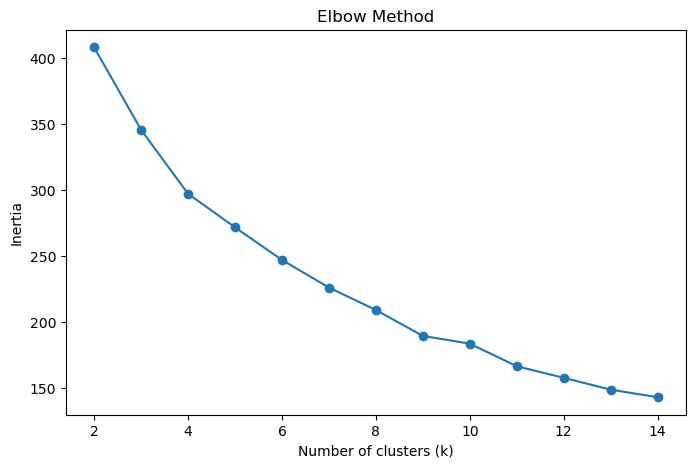

In [215]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

Considering the optimal k as 3 and marking client based on the risk cluster they fall in

In [217]:
kmeans = KMeans(n_clusters=3, random_state=42)
client_df['risk_cluster']=kmeans.fit_predict(features_scaled)

C:\Users\97156\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labelling the cluster and mapping clients accordingly

In [219]:
cluster_labels={0:'Low Risk',1:'Moderate Risk',2:'High Risk'}
client_df['risk_cluster']=client_df['risk_cluster'].map(cluster_labels)

In [221]:
client_df

,client_id,deposit_sum,withdrawal_sum,avg_win_rate,avg_balance,balance_volatility,net_flow,risk_score,risk_cluster
0,client_1,8980.416667,4771.333333,0.550760,5127.502088,1959.236683,4209.083333,54.609791,High Risk
1,client_10,13471.000000,6950.833333,0.553805,5050.168242,1977.327016,6520.166667,-285.727773,Low Risk
2,client_100,6392.916667,3268.166667,0.555685,4944.374955,1945.690087,3124.750000,212.522535,High Risk
3,client_11,6831.000000,2994.166667,0.532835,5094.509966,1955.176110,3836.833333,109.021763,Moderate Risk
4,client_12,9598.916667,5085.083333,0.536280,5044.499110,1970.266497,4513.833333,12.776169,Low Risk
...,...,...,...,...,...,...,...,...,...
95,client_95,4387.666667,3040.916667,0.537359,5009.128528,1806.593653,1346.750000,430.576411,Moderate Risk
96,client_96,8107.416667,3487.083333,0.552665,4928.405696,2089.234242,4620.333333,38.403971,High Risk
97,client_97,13219.916667,6347.416667,0.546668,5018.341300,2014.291547,6872.500000,-325.640915,Low Risk
98,client_98,13376.250000,7816.083333,0.533716,4809.878433,2039.693998,5560.166667,-119.878638,Low Risk


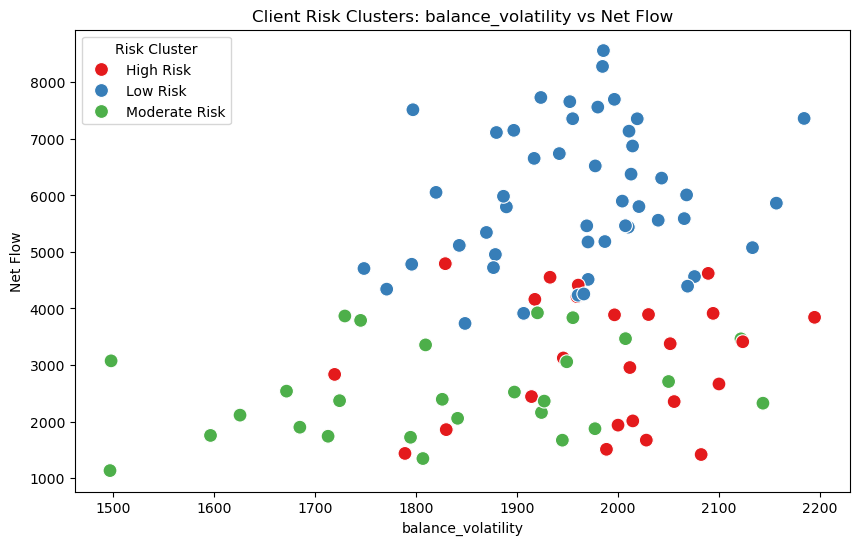

In [225]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=client_df, x='balance_volatility', y='net_flow', hue='risk_cluster', palette='Set1', s=100)
plt.title('Client Risk Clusters: balance_volatility vs Net Flow')
plt.xlabel('balance_volatility')
plt.ylabel('Net Flow')
plt.legend(title='Risk Cluster')
plt.show()

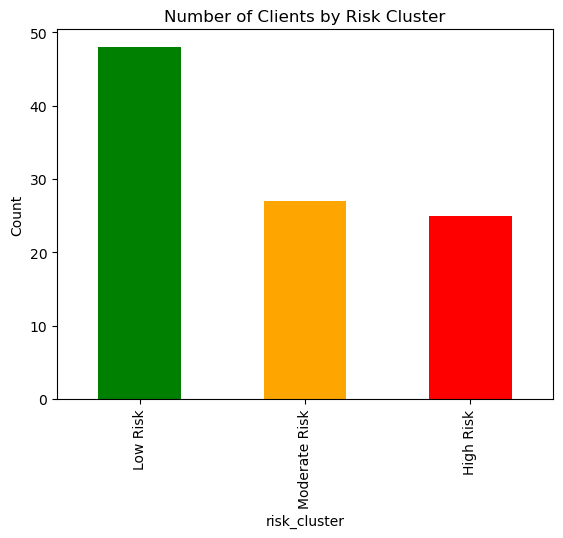

In [229]:
client_df['risk_cluster'].value_counts().plot(kind='bar', color=['green','orange','red'])
plt.title('Number of Clients by Risk Cluster')
plt.ylabel('Count')
plt.show()

C:\Users\97156\AppData\Local\Temp\ipykernel_104628\2726850888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=client_df, x='risk_cluster', y='balance_volatility', palette='Set1')


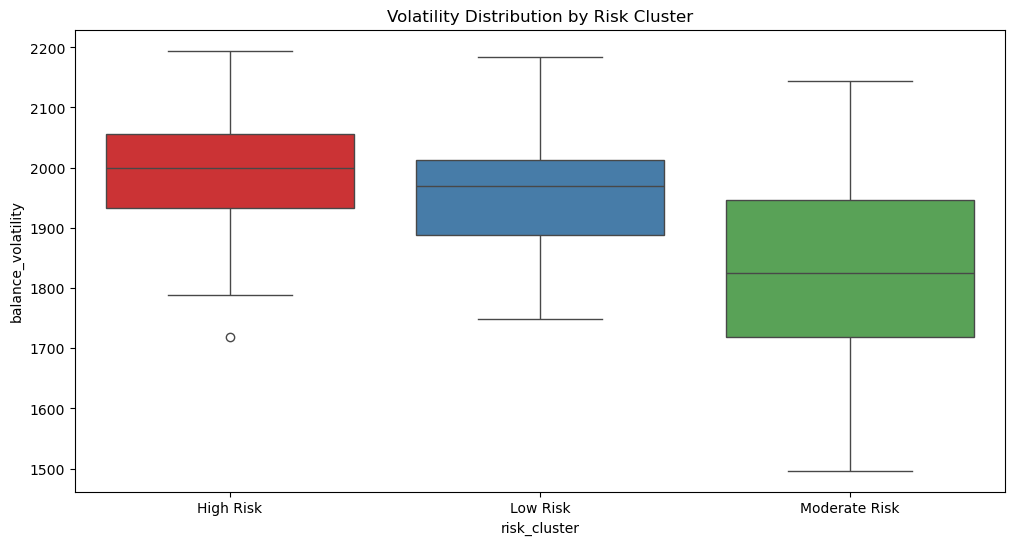

In [233]:
plt.figure(figsize=(12,6))
sns.boxplot(data=client_df, x='risk_cluster', y='balance_volatility', palette='Set1')
plt.title('Volatility Distribution by Risk Cluster')
plt.show()